# Internet archive 'big data' for 'small histories' 

Note: this is a work in progress. 

Web archives have been around for 

* Outline of project
* reasoning 
* limitations 


### Getting the data

The first couple of steps will take place outside of this notebook but are fairly straight forward. The first thing we will need to do is to get the data we are going to be working wit. A collection of open data from the internet archive can be found [here](http://data.webarchive.org.uk/opendata/). The dataset we are looking at can be downloaded from [here](http://data.webarchive.org.uk/opendata/ukwa.ds.2/host-linkage/). The file is around 16GB so you may want to consider using a download manager to download the file. A download manager should speed things up a little but also make it easier to deal with any issues during the download. I use [aira](https://aria2.github.io/) but there are other out there. Make sure you have enought room to download the file. 

Once you have the file downloaded on your computer we could do a number of different things. 

In [226]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import seaborn

### Importing data into Python

In [207]:
wellcome_data = pd.read_table('wellcome-linkage.tsv', names=['year','origin','link','times-linked'], sep='\||\t', engine='python')


In [259]:
wellcome_data[:10]

year                      origin                      link  times-linked
0  1996      odin.neuro.soton.ac.uk        www.wellcome.ac.uk             1
1  1996    tarantula.wellcome.ac.uk  tarantula.wellcome.ac.uk            24
2  1996          www.ability.org.uk    www.tmr.wellcome.ac.uk             1
3  1996       www.healthindex.co.uk    www.tmr.wellcome.ac.uk             1
4  1997       atuin.chime.ucl.ac.uk        www.wellcome.ac.uk            10
5  1997             back.niss.ac.uk        www.wellcome.ac.uk             1
6  1997  bushmills.mic.dundee.ac.uk        www.wellcome.ac.uk             2
7  1997            com2.uclan.ac.uk        www.wellcome.ac.uk             7
8  1997       epidemic.zoo.ox.ac.uk    www.tmr.wellcome.ac.uk             2
9  1997     garbo.psychol.ucl.ac.uk        www.wellcome.ac.uk             5

### sorting data by times-linked

* sort by number of times linked


In [282]:
wellcome_data.sort_values(by='times-linked', ascending=0)[:20]

year                   origin                     link  times-linked
14321  2004       www.wellcome.ac.uk       www.wellcome.ac.uk        619077
10467  2003       www.wellcome.ac.uk       www.wellcome.ac.uk        483541
26772  2008       www.wellcome.ac.uk       www.wellcome.ac.uk        247042
17552  2005       www.wellcome.ac.uk       www.wellcome.ac.uk        237786
23856  2007       www.wellcome.ac.uk       www.wellcome.ac.uk        180320
20498  2006       www.wellcome.ac.uk       www.wellcome.ac.uk        169626
10922  2004   library.wellcome.ac.uk   library.wellcome.ac.uk        134802
4921   2001       www.wellcome.ac.uk       www.wellcome.ac.uk        125546
14751  2005   library.wellcome.ac.uk   library.wellcome.ac.uk        114517
31673  2010       www.wellcome.ac.uk       www.wellcome.ac.uk        109542
20733  2007    genome.wellcome.ac.uk    genome.wellcome.ac.uk         93092
29184  2009       www.wellcome.ac.uk       www.wellcome.ac.uk         84507
7182   2002       www.wellcome.ac.uk       www.wellcome.ac.uk         82982
7579   2003   library.wellcome.ac.uk   library.wellcome.ac.uk         77181
17793  2006    genome.wellcome.ac.uk    genome.wellcome.ac.uk         76442
21240  2007   library.wellcome.ac.uk   library.wellcome.ac.uk         63633
8012   2003  medphoto.wellcome.ac.uk  medphoto.wellcome.ac.uk         60482
2814   2000       www.wellcome.ac.uk       www.wellcome.ac.uk         47567
24064  2008    genome.wellcome.ac.uk    genome.wellcome.ac.uk         43632
18199  2006   library.wellcome.ac.uk   library.wellcome.ac.uk         37760

### Number of links over time

* number of links to and from the Wellome.ac.uk website. 

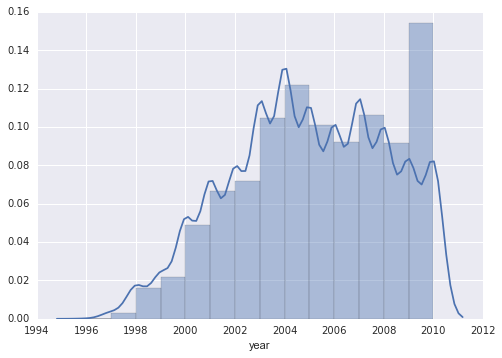

In [232]:
import seaborn
seaborn.distplot(wellcome_data['year'], bins=14)

### Comparing 1996 to 2010 

In [242]:
wellcome_data1996 = wellcome_data[wellcome_data.year ==1996]
wellcome_data2010 = wellcome_data[wellcome_data.year ==2010]

In [249]:
shared_links = []
non_shared_links = []
for link in wellcome_data1996['link']:
    if link in wellcome_data['link']:
        shared_links.append(link)
    else:
        non_shared_links.append(link)
print(shared_links)
print(non_shared_links)

[]
['www.wellcome.ac.uk', 'tarantula.wellcome.ac.uk', 'www.tmr.wellcome.ac.uk', 'www.tmr.wellcome.ac.uk']


### Looking at wellcome links to other websites
sort origin to only include wellcome.ac.uk domain. 


KeyError: "['wellcome' 'wellcome' 'wellcome' ..., 'wellcome' 'wellcome' 'wellcome'] not in index"